In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 
import seaborn as sns

In [2]:
def split_age_group(age):
    if age <= 84:
        return '1-7'
    elif 84 <age <= 144:
        return '8-12'
    else:
        return '13-18'

In [3]:
#def split_age_group(age):
#    if age <= 120:
#        return '1-10'
#    else:
#        return '11-18'

In [4]:
base_bone_dir = os.path.join('..', 'input')
age_df = pd.read_csv(os.path.join(base_bone_dir, 'boneage-training-dataset.csv'))
age_df['path'] = age_df['id'].map(lambda x: os.path.join(base_bone_dir,
                                                         'boneage-training-dataset', 
                                                         'boneage-training-dataset', 
                                                         '{}.png'.format(x)))
age_df['age_group'] = age_df['boneage'].apply(split_age_group)
# Split the dataset for age group 1-10 years
age_df_age1_7 = age_df[age_df['age_group'] == '1-7']
# Split the dataset for age group 11-18 years
age_df_age8_12 = age_df[age_df['age_group'] == '8-12']
age_df_age13_18 = age_df[age_df['age_group'] == '13-18']
age_df_age8_12['exists'] = age_df_age8_12['path'].map(os.path.exists)
print(age_df_age8_12['exists'].sum(), 'images found of', age_df_age8_12.shape[0], 'total')
age_df_age8_12['gender'] = age_df_age8_12['male'].map(lambda x: 'male' if x else 'female')
boneage_mean = age_df_age8_12['boneage'].mean()
boneage_div = 2*age_df_age8_12['boneage'].std()
age_df_age8_12['boneage_zscore'] = age_df_age8_12['boneage'].map(lambda x: (x-boneage_mean)/boneage_div)
age_df_age8_12.dropna(inplace = True)
age_df_age8_12.sample(25)




5475 images found of 5475 total


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

id  boneage   male  \
591     2043      120  False   
8748   11292      120  False   
5995    8220       94  False   
9388   12016      106  False   
3177    5104      120   True   
11181  14019      132   True   
10953  13765      120  False   
9226   11833      100  False   
93      1481      100   True   
2249    3883      120   True   
9183   11786      132  False   
5419    7583      126  False   
2052    3666      144  False   
11619  14504      138   True   
7742   10161      132   True   
8918   11485      113  False   
1828    3413      138   True   
9487   12126      126   True   
5413    7576      120  False   
4436    6485      138   True   
1888    3484       90   True   
4827    6923      120   True   
4677    6758       94  False   
5047    7166      132  False   
12069  15010      144  False   

                                                    path age_group  exists  \
591    ../input/boneage-training-dataset/boneage-trai...      8-12    True   
8748   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
5995   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
9388   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
3177   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
11181  ../input/boneage-training-dataset/boneage-trai...      8-12    True   
10953  ../input/boneage-training-dataset/boneage-trai...      8-12    True   
9226   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
93     ../input/boneage-training-dataset/boneage-trai...      8-12    True   
2249   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
9183   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
5419   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
2052   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
11619  ../input/boneage-training-dataset/boneage-trai...      8-12    True   
7742   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
8918   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
1828   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
9487   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
5413   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
4436   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
1888   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
4827   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
4677   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
5047   ../input/boneage-training-dataset/boneage-trai...      8-12    True   
12069  ../input/boneage-training-dataset/boneage-trai...      8-12    True   

       gender  boneage_zscore  
591    female       -0.018966  
8748   female       -0.018966  
5995   female       -0.797688  
9388   female       -0.438278  
3177     male       -0.018966  
11181    male        0.340444  
10953  female       -0.018966  
9226   female       -0.617983  
93       male       -0.617983  
2249     male       -0.018966  
9183   female        0.340444  
5419   female        0.160739  
2052   female        0.699854  
11619    male        0.520149  
7742     male        0.340444  
8918   female       -0.228622  
1828     male        0.520149  
9487     male        0.160739  
5413   female       -0.018966  
4436     male        0.520149  
1888     male       -0.917491  
4827     male       -0.018966  
4677   female       -0.797688  
5047   female        0.340444  
12069  female        0.699854

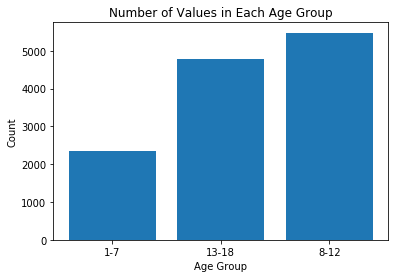

In [5]:
class_counts = age_df['age_group'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)

# Add labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of Values in Each Age Group')

# Display the chart
plt.show()

# Examine the distribution of age and gender
Age is shown in months

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x78a06447e048>,
      dtype=object)

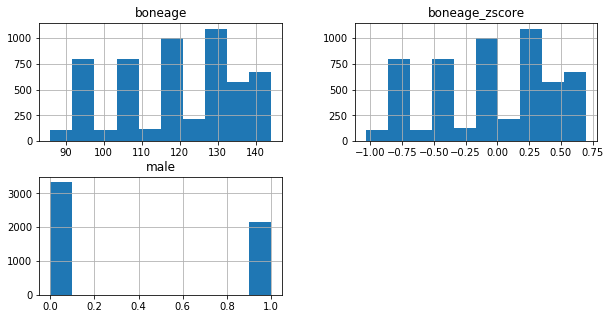

In [6]:
age_df_age8_12[['boneage', 'male', 'boneage_zscore']].hist(figsize = (10, 5))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


New Data Size: 8000 Old Size: 12611


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x78a0643f2128>,
      dtype=object)

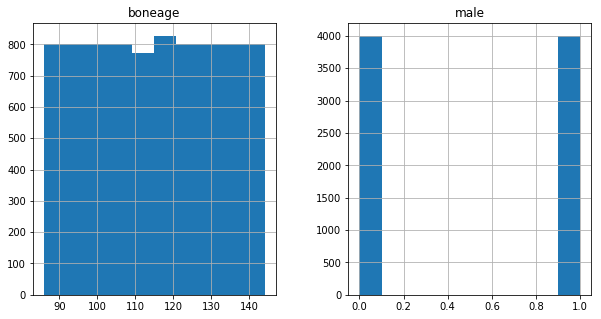

In [7]:
# Add 'boneage_category' column
age_df_age8_12['boneage_category'] = pd.cut(age_df_age8_12['boneage'], 10)

# Create new_age_df by grouping and sampling
new_age_df = age_df_age8_12.groupby(['boneage_category', 'male']).apply(lambda x: x.sample(400, replace=True)).reset_index(drop=True)

print('New Data Size:', new_age_df.shape[0], 'Old Size:', age_df.shape[0])
new_age_df[['boneage', 'male']].hist(figsize=(10, 5))

In [8]:
# age_df['boneage_category'] = pd.cut(age_df['boneage'], 10)
# new_age_df = age_df.groupby(['boneage_category', 'male']).apply(lambda x: x.sample(400, replace = True)
#                                                       ).reset_index(drop = True)
# print('New Data Size:', new_age_df.shape[0], 'Old Size:', age_df.shape[0])
# new_age_df[['boneage', 'male']].hist(figsize = (10, 5))

# Split Data into Training and Validation

In [9]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(new_age_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = new_age_df['boneage_category'])
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 6000 validation 2000


In [10]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (512, 512)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.1, 
                              width_shift_range = 0.1, 
                              rotation_range = 10, 
                              shear_range = 0.05,
                              fill_mode = 'nearest',
                              zoom_range=0.15)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [12]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'path',
                            y_col = 'boneage_zscore', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'path',
                            y_col = 'boneage_zscore', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'path',
                            y_col = 'boneage_zscore', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 250)) # one big batch

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 6000 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2000 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2000 images


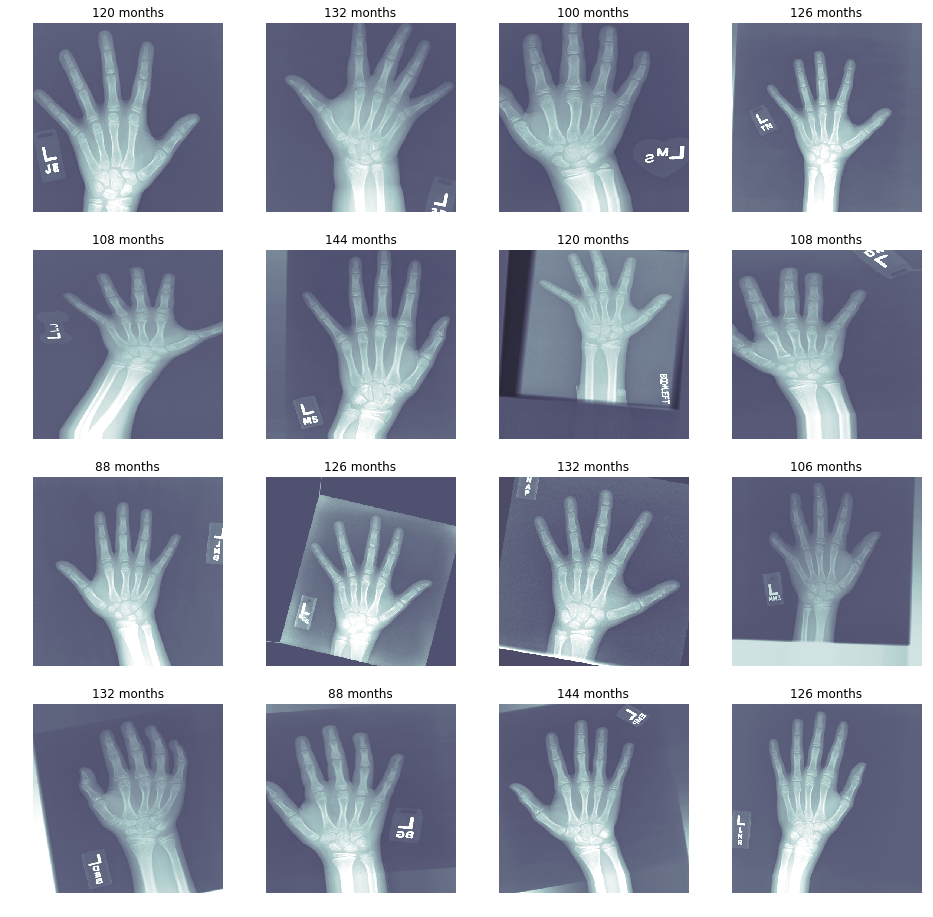

In [13]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -3, vmax = 3)
    c_ax.set_title('%2.0f months' % (c_y*boneage_div+boneage_mean))
    c_ax.axis('off')

## Training Pre-trained Models

## Xception

In [14]:
from keras.applications import Xception
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
base_model = Xception(input_shape =  t_x.shape[1:], 
                                 include_top = False, 
                                 weights = None)
bone_age_model = Sequential()
bone_age_model.add(BatchNormalization(input_shape = t_x.shape[1:]))
bone_age_model.add(base_model)
bone_age_model.add(BatchNormalization())
bone_age_model.add(GlobalAveragePooling2D())
bone_age_model.add(Dropout(0.5))
bone_age_model.add(Dense(1, activation = 'linear' )) # linear is what 16bit did
from keras.metrics import mean_absolute_error
def mae_months(in_gt, in_pred):
    return mean_absolute_error(boneage_div*in_gt, boneage_div*in_pred)

bone_age_model.compile(optimizer = 'adam', loss = 'mse',
                           metrics = [mae_months])

bone_age_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 512, 512, 1)       4         
_________________________________________________________________
xception (Model)             (None, 16, 16, 2048)      20860904  
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 2048)      8192      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 20,871,149
Trainable params: 20,812,523
Non-trainable params: 58,626
___________________________________________________________

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best1.hdf5".format('bone_age')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/callbacks.py:919: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.


In [16]:
train_gen.batch_size = 8
history1 = bone_age_model.fit_generator(train_gen,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 10, 
                                  callbacks = callbacks_list)

Epoch 1/10
750/750 [==============================] - 523s 698ms/step - loss: 0.3737 - mae_months: 16.4912 - val_loss: 82.9634 - val_mae_months: 294.3217

Epoch 00001: val_loss improved from inf to 82.96341, saving model to bone_age_weights.best1.hdf5
Epoch 2/10
750/750 [==============================] - 498s 664ms/step - loss: 0.2886 - mae_months: 15.4544 - val_loss: 0.3163 - val_mae_months: 15.9226

Epoch 00002: val_loss improved from 82.96341 to 0.31633, saving model to bone_age_weights.best1.hdf5
Epoch 3/10
750/750 [==============================] - 499s 666ms/step - loss: 0.2734 - mae_months: 14.8958 - val_loss: 0.3469 - val_mae_months: 16.7040

Epoch 00003: val_loss did not improve
Epoch 4/10
750/750 [==============================] - 500s 667ms/step - loss: 0.2527 - mae_months: 14.1539 - val_loss: 0.2669 - val_mae_months: 14.1481

Epoch 00004: val_loss improved from 0.31633 to 0.26690, saving model to bone_age_weights.best1.hdf5
Epoch 5/10
750/750 [==============================

In [17]:
weight_path="{}_weights.best1.hdf5".format('bone_age')
bone_age_model.load_weights(weight_path)

In [18]:
pred_Y = boneage_div*bone_age_model.predict(test_X, batch_size = 16, verbose = True)+boneage_mean
test_Y_months = boneage_div*test_Y+boneage_mean

250/250 [==============================] - 6s 24ms/step


Text(0,0.5,'Predicted Age (Months)')

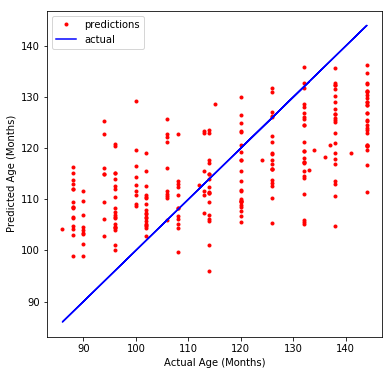

In [19]:
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
ax1.plot(test_Y_months, pred_Y, 'r.', label = 'predictions')
ax1.plot(test_Y_months, test_Y_months, 'b-', label = 'actual')
ax1.legend()
ax1.set_xlabel('Actual Age (Months)')
ax1.set_ylabel('Predicted Age (Months)')

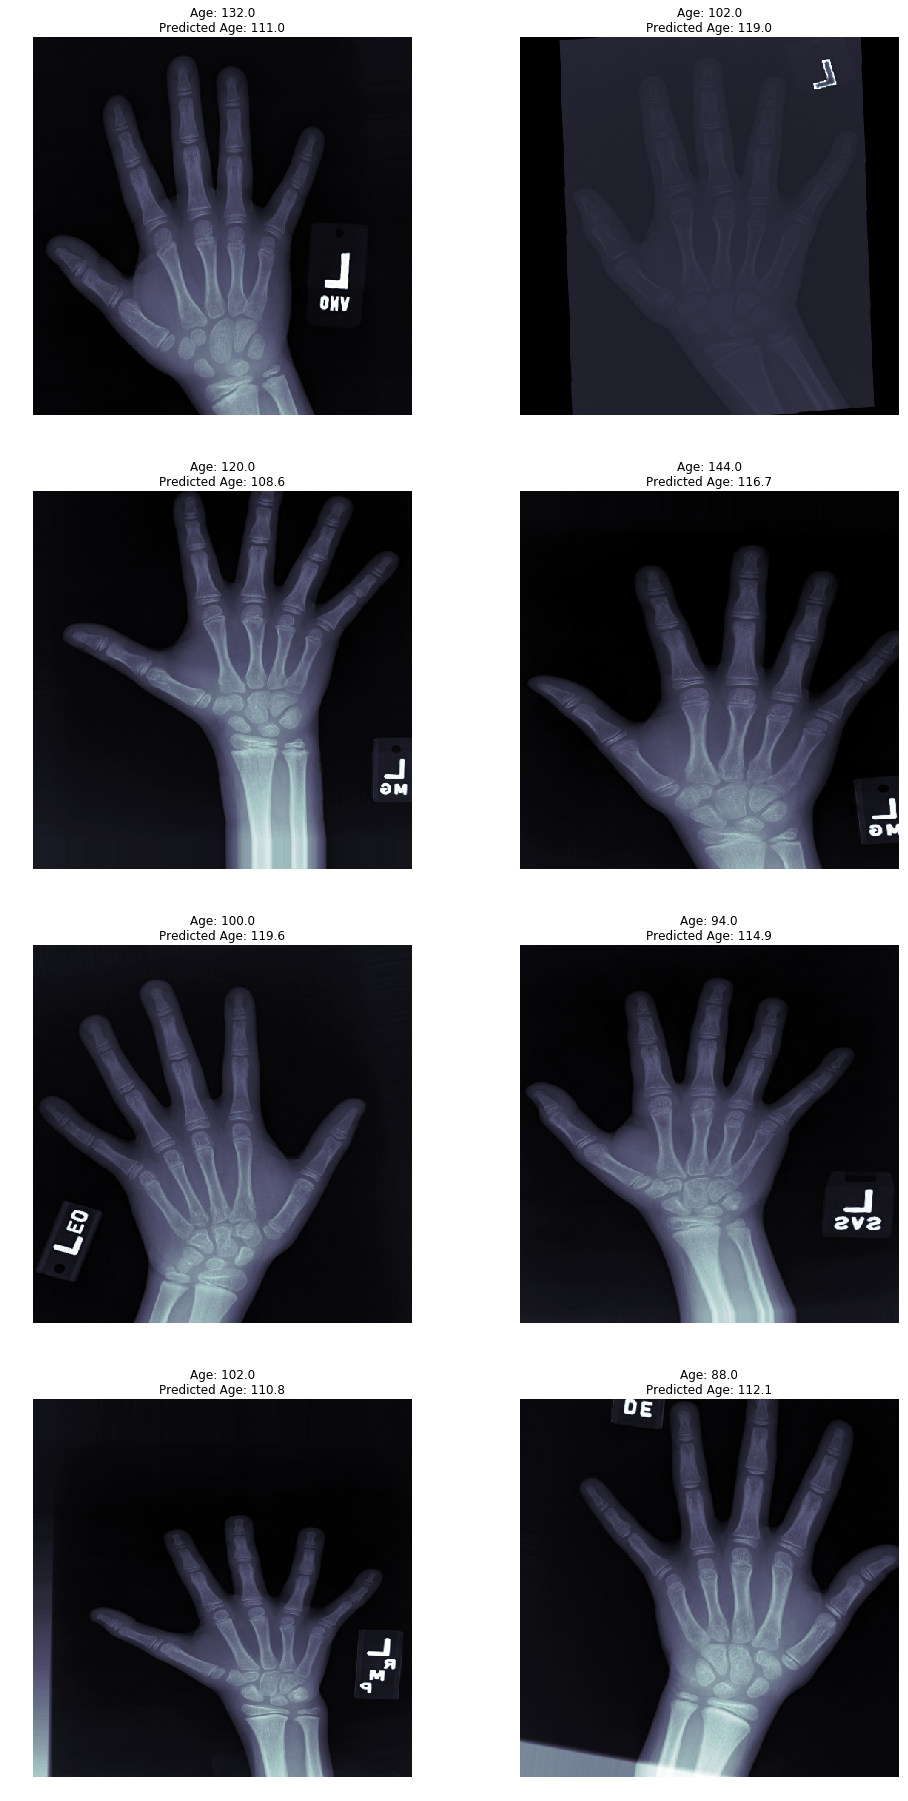

In [20]:
rand_idx = np.random.choice(range(test_X.shape[0]), 8)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(rand_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    
    c_ax.set_title('Age: %2.1f\nPredicted Age: %2.1f' % (test_Y_months[idx], pred_Y[idx]))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png', dpi = 300)

## Evaluation parameters

In [21]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_Y_months, pred_Y)
print(mse)

198.2896096283379


In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y_months, pred_Y)

11.88811065673828

In [23]:
from math import sqrt
root_mean_squared_error = sqrt(mse)
root_mean_squared_error

14.08153434922267

In [24]:
from sklearn.metrics import r2_score
r2_score(test_Y_months, pred_Y)

0.3972891019310365

## Inception-ResNetV2

In [25]:
from keras.applications import InceptionResNetV2
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
base_model = InceptionResNetV2(input_shape =  t_x.shape[1:], 
                                 include_top = False, 
                                 weights = None)
bone_age_model = Sequential()
bone_age_model.add(BatchNormalization(input_shape = t_x.shape[1:]))
bone_age_model.add(base_model)
bone_age_model.add(BatchNormalization())
bone_age_model.add(GlobalAveragePooling2D())
bone_age_model.add(Dropout(0.5))
bone_age_model.add(Dense(1, activation = 'linear' )) # linear is what 16bit did
from keras.metrics import mean_absolute_error
def mae_months(in_gt, in_pred):
    return mean_absolute_error(boneage_div*in_gt, boneage_div*in_pred)

bone_age_model.compile(optimizer = 'adam', loss = 'mse',
                           metrics = [mae_months])

bone_age_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_210 (Bat (None, 512, 512, 1)       4         
_________________________________________________________________
inception_resnet_v2 (Model)  (None, 14, 14, 1536)      54336160  
_________________________________________________________________
batch_normalization_211 (Bat (None, 14, 14, 1536)      6144      
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1536)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1537      
Total params: 54,343,845
Trainable params: 54,280,227
Non-trainable params: 63,618
___________________________________________________________

In [26]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best2.hdf5".format('bone_age')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/callbacks.py:919: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.


In [27]:
train_gen.batch_size = 16
history2 = bone_age_model.fit_generator(train_gen,  
                                  validation_data = (test_X, test_Y), 
                                  epochs = 10, 
                                  callbacks = callbacks_list)

Epoch 1/10
375/375 [==============================] - 587s 2s/step - loss: 0.3455 - mae_months: 16.2567 - val_loss: 2.8811 - val_mae_months: 52.0209

Epoch 00001: val_loss improved from inf to 2.88105, saving model to bone_age_weights.best2.hdf5
Epoch 2/10
375/375 [==============================] - 511s 1s/step - loss: 0.2865 - mae_months: 15.3700 - val_loss: 0.2938 - val_mae_months: 15.7823

Epoch 00002: val_loss improved from 2.88105 to 0.29376, saving model to bone_age_weights.best2.hdf5
Epoch 3/10
375/375 [==============================] - 520s 1s/step - loss: 0.2794 - mae_months: 15.2182 - val_loss: 0.3216 - val_mae_months: 16.0599

Epoch 00003: val_loss did not improve
Epoch 4/10
375/375 [==============================] - 515s 1s/step - loss: 0.2579 - mae_months: 14.4051 - val_loss: 0.2911 - val_mae_months: 15.7183

Epoch 00004: val_loss improved from 0.29376 to 0.29107, saving model to bone_age_weights.best2.hdf5
Epoch 5/10
375/375 [==============================] - 520s 1s/step

In [28]:
bone_age_model.load_weights(weight_path)

In [29]:
pred_Y = boneage_div*bone_age_model.predict(test_X, batch_size = 16, verbose = True)+boneage_mean
test_Y_months = boneage_div*test_Y+boneage_mean

250/250 [==============================] - 13s 51ms/step


Text(0,0.5,'Predicted Age (Months)')

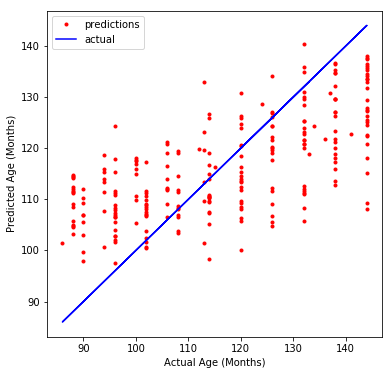

In [30]:
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
ax1.plot(test_Y_months, pred_Y, 'r.', label = 'predictions')
ax1.plot(test_Y_months, test_Y_months, 'b-', label = 'actual')
ax1.legend()
ax1.set_xlabel('Actual Age (Months)')
ax1.set_ylabel('Predicted Age (Months)')

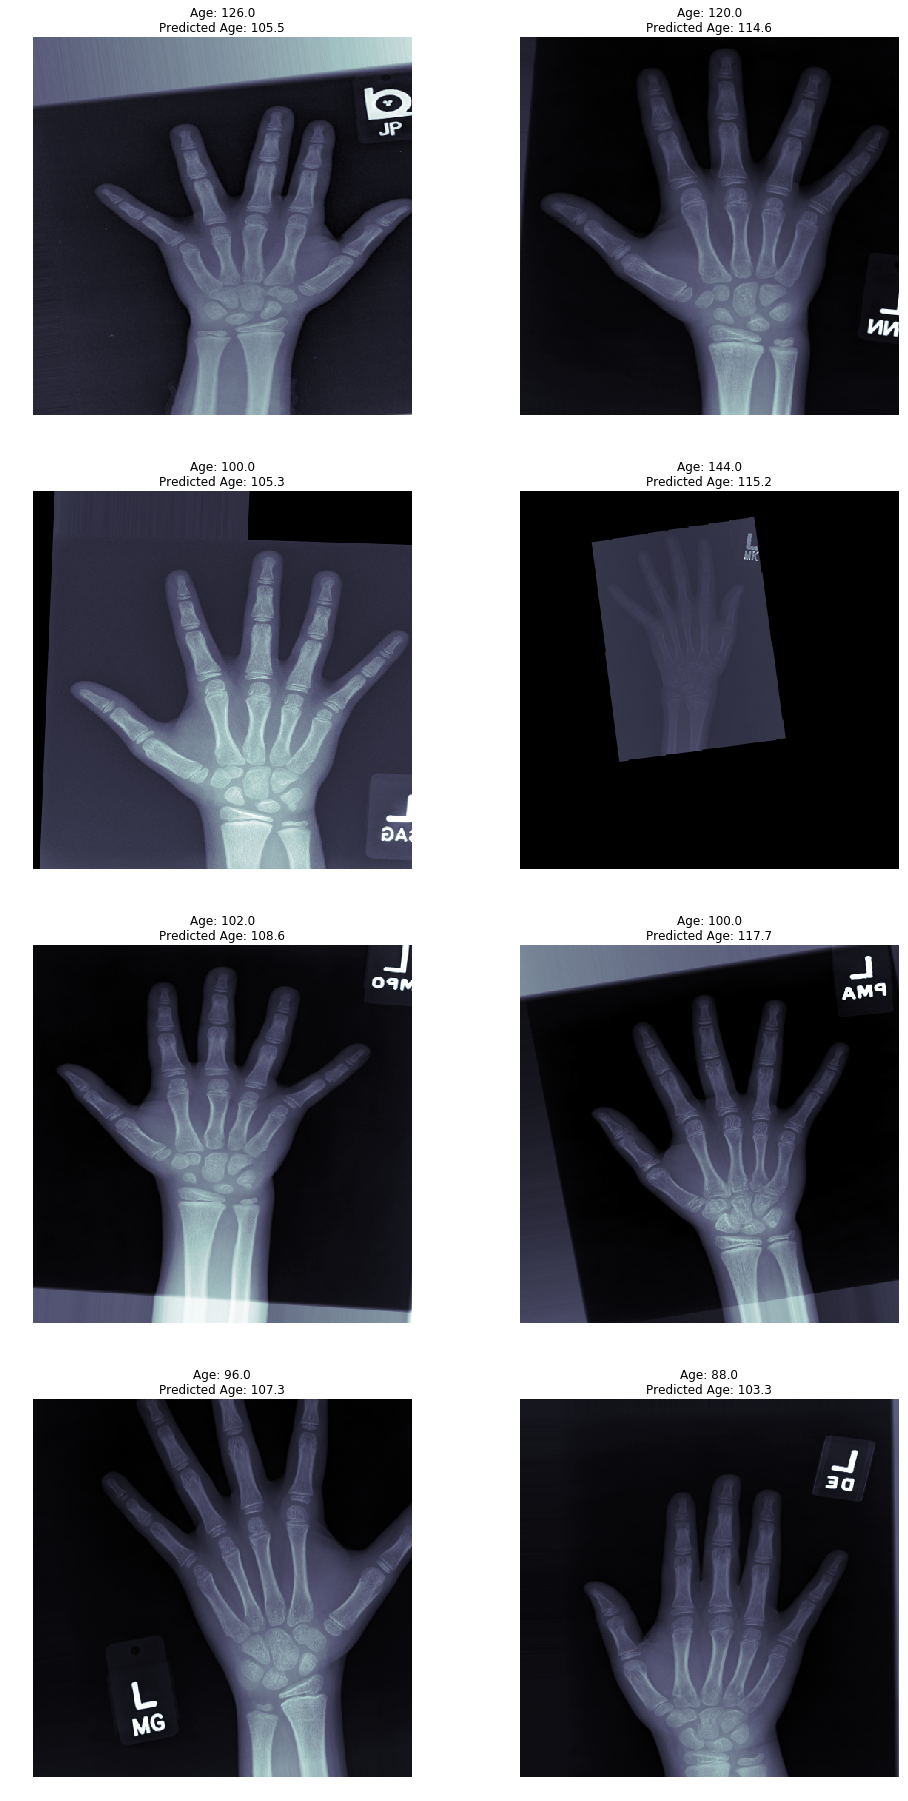

In [31]:
rand_idx = np.random.choice(range(test_X.shape[0]), 8)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(rand_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    
    c_ax.set_title('Age: %2.1f\nPredicted Age: %2.1f' % (test_Y_months[idx], pred_Y[idx]))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png', dpi = 300)

## Evaluation parameters

In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_Y_months, pred_Y)
print(mse)

182.29754403328639


In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y_months, pred_Y)

11.223000885009766

In [34]:
from math import sqrt
root_mean_squared_error = sqrt(mse)
root_mean_squared_error

13.501760775294695

In [35]:
from sklearn.metrics import r2_score
r2_score(test_Y_months, pred_Y)

0.44589776193514497

# **MobileNet**

In [36]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:], 
                                 include_top = False, weights = None)
bone_age_model = Sequential()
bone_age_model.add(base_mobilenet_model)
bone_age_model.add(GlobalAveragePooling2D())
bone_age_model.add(Dropout(0.5))
bone_age_model.add(Dense(1, activation = 'linear' )) # linear is what 16bit did
from keras.metrics import mean_absolute_error
def mae_months(in_gt, in_pred):
    return mean_absolute_error(boneage_div*in_gt, boneage_div*in_pred)

bone_age_model.compile(optimizer = 'adam', loss = 'mse',
                           metrics = [mae_months])

bone_age_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_512 (Model)   (None, 16, 16, 1024)      3228288   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 3,229,313
Trainable params: 3,207,425
Non-trainable params: 21,888
_________________________________________________________________


In [37]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best3.hdf5".format('bone_age')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/callbacks.py:919: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.


In [38]:
train_gen.batch_size = 16
history3 = bone_age_model.fit_generator(train_gen,  
                                  validation_data = (test_X, test_Y), 
                                  epochs = 10, 
                                  callbacks = callbacks_list)

Epoch 1/10
375/375 [==============================] - 430s 1s/step - loss: 0.4104 - mae_months: 17.5677 - val_loss: 0.3074 - val_mae_months: 16.0000

Epoch 00001: val_loss improved from inf to 0.30741, saving model to bone_age_weights.best3.hdf5
Epoch 2/10
375/375 [==============================] - 411s 1s/step - loss: 0.2996 - mae_months: 15.6493 - val_loss: 0.2930 - val_mae_months: 15.7522

Epoch 00002: val_loss improved from 0.30741 to 0.29304, saving model to bone_age_weights.best3.hdf5
Epoch 3/10
375/375 [==============================] - 415s 1s/step - loss: 0.2868 - mae_months: 15.4090 - val_loss: 0.3161 - val_mae_months: 15.9176

Epoch 00003: val_loss did not improve
Epoch 4/10
375/375 [==============================] - 415s 1s/step - loss: 0.2710 - mae_months: 14.9147 - val_loss: 0.2943 - val_mae_months: 15.1035

Epoch 00004: val_loss did not improve
Epoch 5/10
375/375 [==============================] - 410s 1s/step - loss: 0.2415 - mae_months: 13.8959 - val_loss: 0.4485 - val

In [39]:
bone_age_model.load_weights(weight_path)

In [40]:
pred_Y = boneage_div*bone_age_model.predict(test_X, batch_size = 16, verbose = True)+boneage_mean
test_Y_months = boneage_div*test_Y+boneage_mean

250/250 [==============================] - 7s 29ms/step


Text(0,0.5,'Predicted Age (Months)')

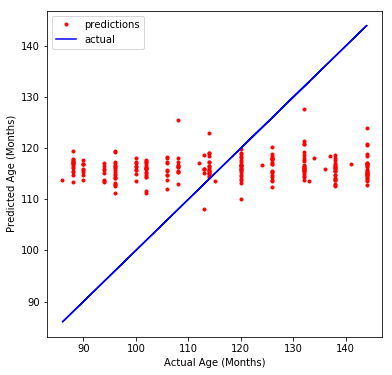

In [41]:
fig, ax1 = plt.subplots(1,1, figsize = (6,6))
ax1.plot(test_Y_months, pred_Y, 'r.', label = 'predictions')
ax1.plot(test_Y_months, test_Y_months, 'b-', label = 'actual')
ax1.legend()
ax1.set_xlabel('Actual Age (Months)')
ax1.set_ylabel('Predicted Age (Months)')

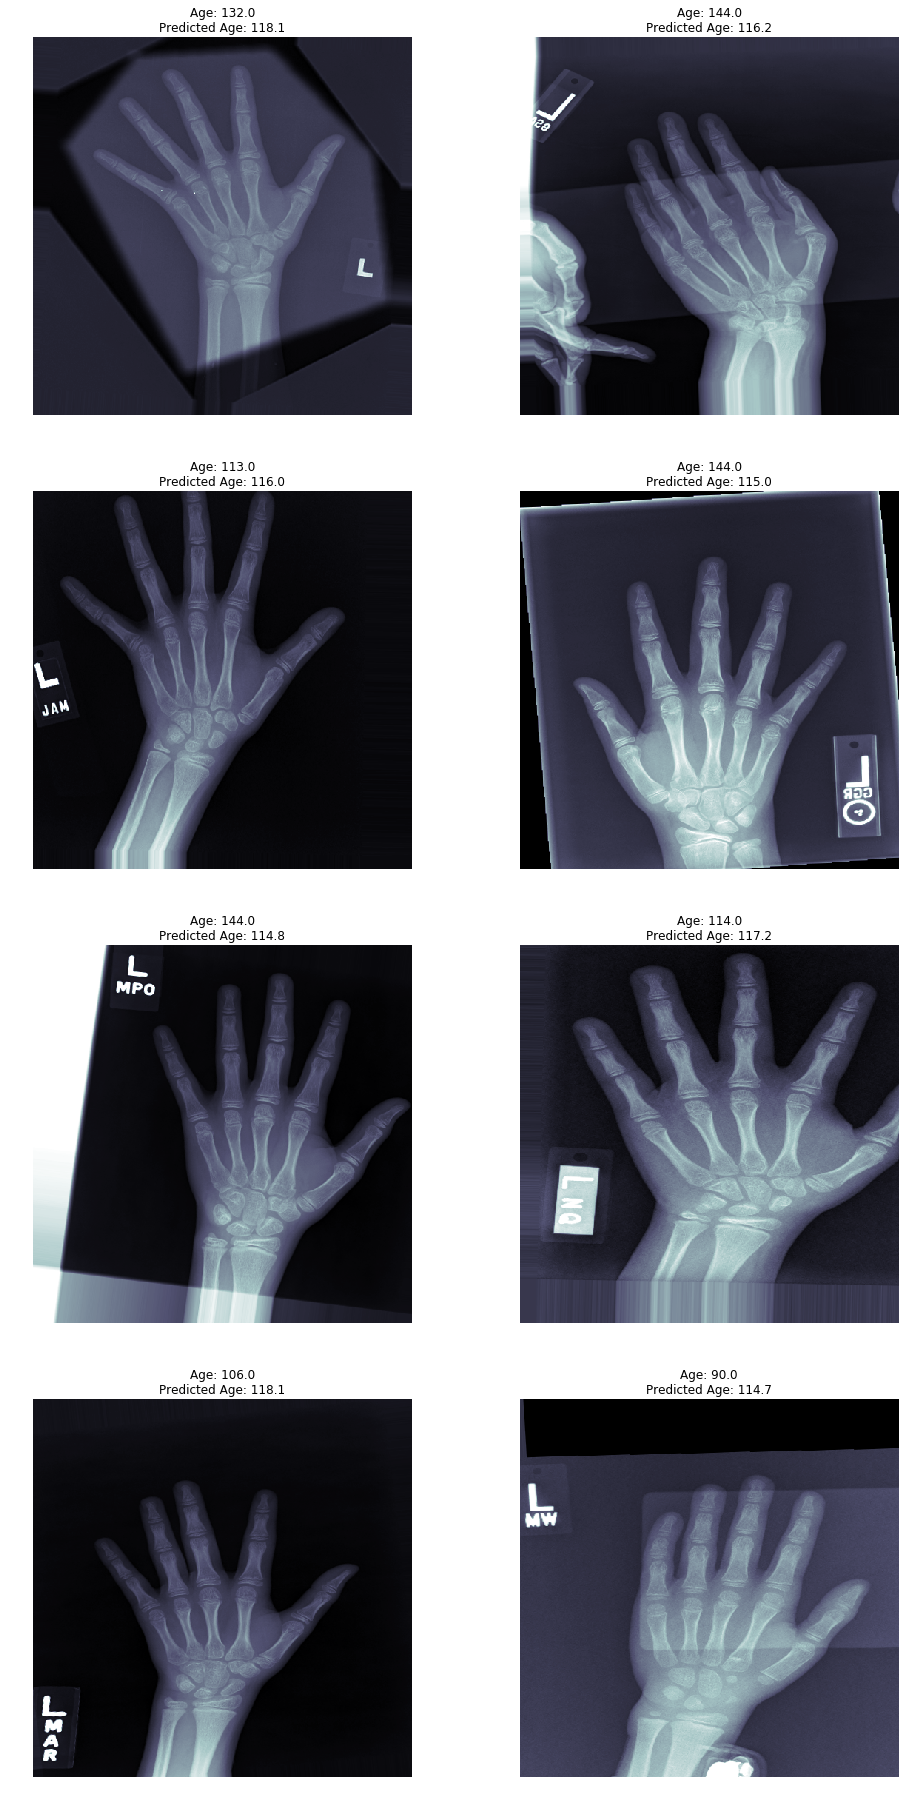

In [42]:
rand_idx = np.random.choice(range(test_X.shape[0]), 8)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(rand_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    
    c_ax.set_title('Age: %2.1f\nPredicted Age: %2.1f' % (test_Y_months[idx], pred_Y[idx]))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png', dpi = 300)

# Evaluation parameters

In [43]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_Y_months, pred_Y)
print(mse)

326.67196365676006


In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y_months, pred_Y)

15.752241180419922

In [45]:
from math import sqrt
root_mean_squared_error = sqrt(mse)
root_mean_squared_error

18.074068818524513

In [46]:
from sklearn.metrics import r2_score
r2_score(test_Y_months, pred_Y)

0.007064702187098648

## Comparison between pre-trained Models

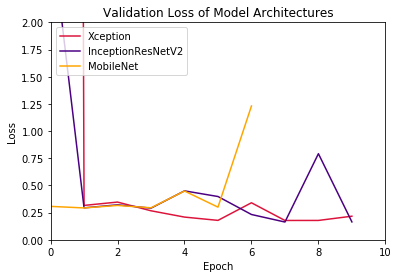

In [47]:
# Validation loss plot 
plt.plot(history1.history['val_loss'], color='crimson')
plt.plot(history2.history['val_loss'], color='indigo')
plt.plot(history3.history['val_loss'], color='orange')
plt.title('Validation Loss of Model Architectures')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 2)
plt.xlim(0.0,10.0)
plt.legend(['Xception', 'InceptionResNetV2','MobileNet'], loc='upper left')
plt.show()

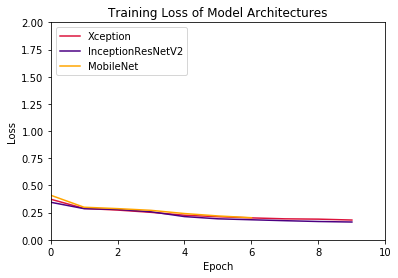

In [48]:
# Train loss plot 
plt.plot(history1.history['loss'], color='crimson')
plt.plot(history2.history['loss'], color='indigo')
plt.plot(history3.history['loss'], color='orange')
plt.title('Training Loss of Model Architectures')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 2)
plt.xlim(0.0,10.0)
plt.legend(['Xception', 'InceptionResNetV2','MobileNet'], loc='upper left')
plt.show()

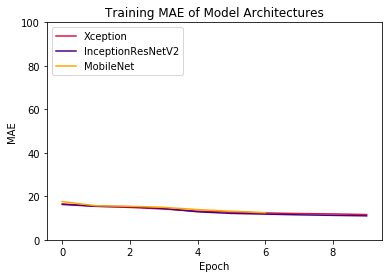

In [49]:
# Train MAE plot 
plt.plot(history1.history['mae_months'], color='crimson')
plt.plot(history2.history['mae_months'], color='indigo')
plt.plot(history3.history['mae_months'], color='orange')
plt.title('Training MAE of Model Architectures')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.ylim(0,100)
plt.xlim()
plt.legend(['Xception', 'InceptionResNetV2','MobileNet'], loc='upper left')
plt.show()

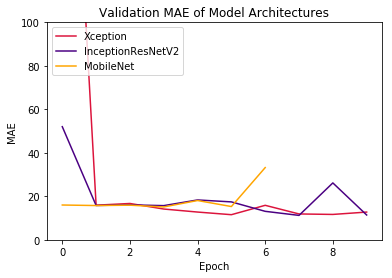

In [50]:
# Validation MAE plot 
plt.plot(history1.history['val_mae_months'], color='crimson')
plt.plot(history2.history['val_mae_months'], color='indigo')
plt.plot(history3.history['val_mae_months'], color='orange')
plt.title('Validation MAE of Model Architectures')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.ylim(0,100)
plt.xlim()
plt.legend(['Xception', 'InceptionResNetV2','MobileNet'], loc='upper left')
plt.show()